In [2]:
## create and run neural network

In [20]:
"""
Created on Fri May  8 19:31:28 2020

@author: qingn
"""

import tensorflow as tf
import pandas as pd
import numpy as np
import pickle 
import timeit
import matplotlib.pyplot as plt
from tensorflow import keras
# from sklearn.model_selection import cross_val_score, cross_val_predict
import os
import time
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Tensorflow 2.0 way of doing things
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential
import netCDF4
# Default plotting parameters
FONTSIZE = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = FONTSIZE

# build model with keras includes three hidden layers and [8,8,7] neurals, default activation function is elu, loss function is mse...

def build_model(n_inputs, n_hidden, n_output, activation='elu', lrate=0.001):
    model = Sequential();
    model.add(InputLayer(input_shape=(n_inputs,)))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_1", activation=activation))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_2", activation=activation))
    model.add(Dense(n_hidden-1, use_bias=True, name="hidden_3", activation=activation))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_4", activation=activation))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_5", activation=activation))
#     model.add(Dense(n_hidden, use_bias=True, name="hidden_6", activation=activation))
    model.add(Dense(n_output, use_bias=True, name="output", activation=activation))
    
    opt = tf.keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999,
                                epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mse', optimizer=opt)
    print(model.summary())
    return model


def build_model1(n_inputs, n_hidden, n_output, activation='elu', lrate=0.001):
    model = Sequential();
    model.add(InputLayer(input_shape=(n_inputs,)))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_1", activation=activation))
    model.add(Dense(n_hidden, use_bias=True, name="hidden_2", activation=activation))
#     model.add(Dense(n_hidden-1, use_bias=True, name="hidden_3", activation=activation))
#     model.add(Dense(n_hidden, use_bias=True, name="hidden_4", activation=activation))
#     model.add(Dense(n_hidden, use_bias=True, name="hidden_5", activation=activation))
#     model.add(Dense(n_hidden, use_bias=True, name="hidden_6", activation=activation))
    model.add(Dense(n_output, use_bias=True, name="output", activation=activation))
    
    opt = tf.keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999,
                                epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mse', optimizer=opt)
    print(model.summary())
    return model

In [4]:
data = netCDF4.Dataset('X_y.nc')
ins =  data['X'][:]
outts = np.array(data['y'])
outs = outts.reshape(2250,1)

### Shallow network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 8)                 2408      
_________________________________________________________________
hidden_2 (Dense)             (None, 8)                 72        
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 2,489
Trainable params: 2,489
Non-trainable params: 0
_________________________________________________________________
None
9.25176614299994
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 8)                 2408      
_________________________________________________________________
hidden_2 (Dense)             (None, 8)                 72        
__________

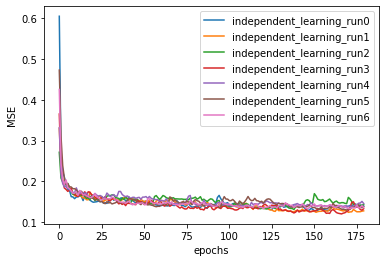

In [5]:
a = []
error = []
plt.figure()
for i in np.arange(7):

    start = timeit.default_timer() #Timming
    model = build_model1(ins.shape[1], 8, outs.shape[1],activation='tanh')#, activation='sigmoid' # setup model
    history = model.fit(x=ins, y=outs, epochs=180, verbose=False) # run the model
    end = timeit.default_timer()
    print(str(end-start)) # How long has been used for each Independent run
# history = model.fit(x=ins, y=outs, epochs=8000, verbose=False,
#                     validation_data=(ins, outs),
#                    callbacks=[checkpoint_cb, early_stopping_cb])
    a.append(history.history['loss'])
    error_each = np.abs((outs-model.predict(ins))[:,0]) # error is defined in this way
    error.append(error_each)
    # Display
   
    plt.plot(history.history['loss'],label = 'independent_learning_run'+str(i))
    plt.legend()
    plt.ylabel('MSE')
    plt.xlabel('epochs')

### Deep network

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 8)                 2408      
_________________________________________________________________
hidden_2 (Dense)             (None, 8)                 72        
_________________________________________________________________
hidden_3 (Dense)             (None, 7)                 63        
_________________________________________________________________
hidden_4 (Dense)             (None, 8)                 64        
_________________________________________________________________
hidden_5 (Dense)             (None, 8)                 72        
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 2,688
Trainable params: 2,688
Non-trainable params: 0
____________________________________________________

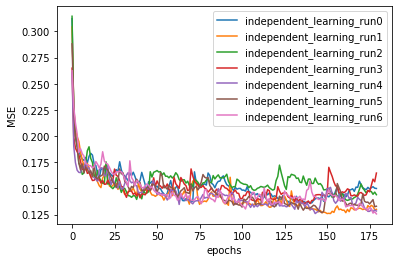

In [6]:
#%%
a = []
error = []
plt.figure()
for i in np.arange(7):

    start = timeit.default_timer() #Timming
    model = build_model(ins.shape[1], 8, outs.shape[1],activation='tanh')#, activation='sigmoid' # setup model
    history = model.fit(x=ins, y=outs, epochs=180, verbose=False) # run the model
    end = timeit.default_timer()
    print(str(end-start)) # How long has been used for each Independent run
# history = model.fit(x=ins, y=outs, epochs=8000, verbose=False,
#                     validation_data=(ins, outs),
#                    callbacks=[checkpoint_cb, early_stopping_cb])
    a.append(history.history['loss'])
    error_each = np.abs((outs-model.predict(ins))[:,0]) # error is defined in this way
    error.append(error_each)
    # Display
   
    plt.plot(history.history['loss'],label = 'independent_learning_run'+str(i))
    plt.legend()
    plt.ylabel('MSE')
    plt.xlabel('epochs')

In [ ]:
#%%
start = timeit.default_timer()
history= model.fit(x=ins, y=outs, epochs=80, verbose=False)
end = timeit.default_timer()
print(str(end-start))

# Now, let us take another step and try to transfer the input data to image and then use CNN to do the training

In [10]:
pred_class = model.predict_classes(ins)

In [11]:
outs

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int8)

Text(0.5, 0, 'time')

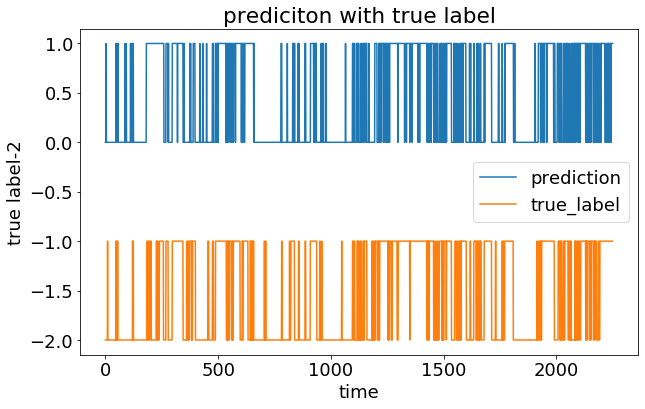

In [27]:
plt.plot(pred_class,label='prediction')
plt.plot(outs-2,label = 'true_label')
plt.title('prediciton with true label')
plt.ylabel('true label-2')
plt.legend()
plt.xlabel('time')

(981, 1269)

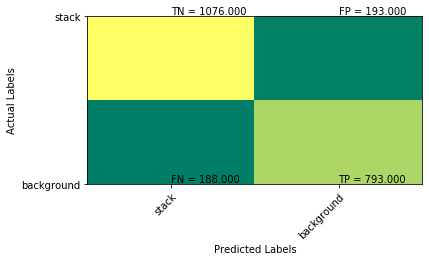

In [18]:
# Generate a color map plot for a confusion matrix
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    ''' 
    Generate a figure that plots a colormap of a matrix
    PARAMS:
        mtx: matrix of values
        xnames: list of x tick names
        ynames: list of the y tick names
        cbarlabel: label for the color bar
    RETURNS:
        fig, ax: the corresponding handles for the figure and axis
    '''
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    
    # create the figure and plot the correlation matrix
    fig, ax = plt.subplots()
    im = ax.imshow(mtx, cmap='summer')
    if not cbarlabel == "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # Specify the row and column ticks and labels for the figure
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, 
             ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            text = ax.text(j, i, "%s = %.3f" % (lbl[i,j], mtx[i, j]),
                           ha="left", va="bottom", color="k")
            #text.set_path_effects([peffects.withStroke(linewidth=2, foreground='w')])

    return fig, ax

""" TODO
DISTANCE
Compute the confusion matrix using sklearn's confusion_matrix() function and 
generate a color map using the provided confusion_mtx_colormap() for the model 
built using the distance labels.
"""
label_names = ['stack', 'background']
dist_lbls = outs
dist_preds = pred_class


dist_confusion_mtx = confusion_matrix(dist_lbls, dist_preds)# TODO

# TODO: generate the confusion matrix color map
confusion_mtx_colormap(dist_confusion_mtx, label_names, label_names, cbarlabel="")


nneg = dist_confusion_mtx[0].sum()
npos = dist_confusion_mtx[1].sum()
npos, nneg

In [ ]:
# Compute the ROC Curve and generate the KS plot
def ks_roc_plot(targets, predictions, FIGWIDTH=12, FIGHEIGHT=6, FONTSIZE=16):
    ''' 
    Generate a figure that plots the ROC Curve and the distributions of the 
    TPR and FPR over a set of thresholds
    PARAMS:
        targets: list of true target labels
        predictions: list of predicted labels
    RETURNS:
        fpr: false positive rate
        tpr: true positive rate
        thresholds: thresholds used for the ROC curve
        auc: Area under the ROC Curve
        fig, axs: corresponding handles for the figure and axis
    '''
    fpr, tpr, thresholds = roc_curve(targets, predictions)
    auc_res = auc(fpr, tpr)

    # Generate KS plot
    fig, ax = plt.subplots(1, 2, figsize=(FIGWIDTH,FIGHEIGHT))
    axs = ax.ravel()
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].invert_xaxis()
    ax[0].set_xlabel('threshold', fontsize=FONTSIZE)
    ax[0].set_ylabel('fraction', fontsize=FONTSIZE)
    ax[0].legend(['TPR', 'FPR', 'K-S Distance'], fontsize=FONTSIZE)
    
    # Generate ROC Curve plot
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0,1], [0,1], 'r--')
    ax[1].set_xlabel('FPR', fontsize=FONTSIZE)
    ax[1].set_ylabel('TPR', fontsize=FONTSIZE)
    ax[1].set_aspect('equal', 'box')
    auc_text = ax[1].text(.05, .95, "AUC = %.4f" % auc_res, 
                          color="k", fontsize=FONTSIZE)
    print("AUC:", auc_res)

    return fpr, tpr, thresholds, auc, fig, axs
ks_roc_plot(dist_lbls, dist_scores)

In [21]:
dist_scores = cross_val_predict(model,ins,outs, cv=20, method = 'decision_function')

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x14b6475c0>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.